In [1165]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

plt.rcParams["figure.figsize"]=(15,5)

In [1166]:
def transf_fourier_d (t_k, y_k,f):
    suma_fourier=0
    for i in range(0,len(t_k)):
        suma_fourier=+suma_fourier+y_k[i]*np.exp(-2*np.pi*1j*t_k[i]*f)
        
    return suma_fourier

In [1167]:
t_k=np.linspace(0,20,200)
y_k=np.sin(t_k)
f=0.1

In [1168]:
x=transf_fourier_d(t_k,y_k,f)
x

(10.18289058873271-9.43536532570872j)

Pregunta 2

In [1169]:
N=100
max=50
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((t[1])),100)    

In [1170]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)
eje_y

array([-8.35202469e-03, -7.84701368e-03, -6.32815343e-03, -3.78386139e-03,
       -1.94491315e-04,  4.46819925e-03,  1.02418358e-02,  1.71745139e-02,
        2.53262528e-02,  3.47709109e-02,  4.55986947e-02,  5.79194522e-02,
        7.18670191e-02,  8.76050123e-02,  1.05334651e-01,  1.25305482e-01,
        1.47830383e-01,  1.73307002e-01,  2.02249254e-01,  2.35335050e-01,
        2.73481406e-01,  3.17968194e-01,  3.70653911e-01,  4.34380009e-01,
        5.13804051e-01,  6.17357865e-01,  7.62853877e-01,  1.00008422e+00,
        1.63669786e+00,  1.23374557e+00,  8.39248839e-01,  6.25946644e-01,
        4.75733177e-01,  3.57760960e-01,  2.59248848e-01,  1.73632155e-01,
        9.70731767e-02,  2.71246610e-02, -3.78701693e-02, -9.90743308e-02,
       -1.57308979e-01, -2.13124603e-01, -2.66817538e-01, -3.18400371e-01,
       -3.67527733e-01, -4.13382780e-01, -4.54552804e-01, -4.88975494e-01,
       -5.14107542e-01, -5.27465304e-01, -5.27465304e-01, -5.14107542e-01,
       -4.88975494e-01, -

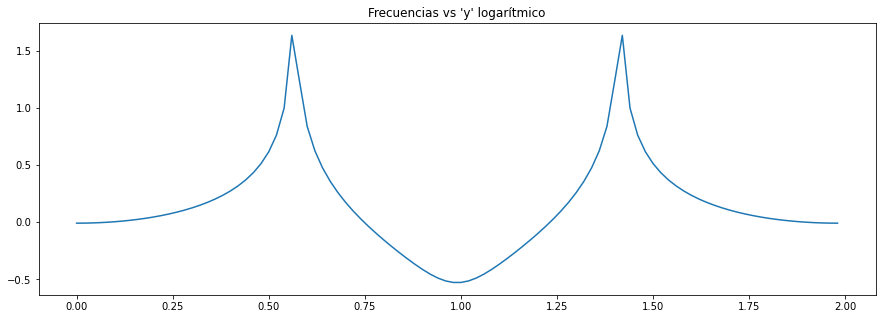

In [1171]:
fig, ax = plt.subplots()

plt.plot(f, eje_y)
plt.title("Frecuencias vs 'y' logarítmico")

plt.show()

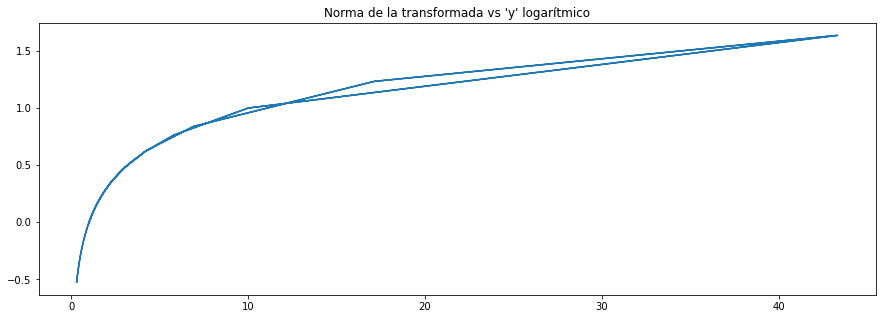

In [1172]:
fig, ax = plt.subplots()

plt.plot(norma, eje_y)
plt.title("Norma de la transformada vs 'y' logarítmico")

plt.show()

In [1173]:
ruido=np.random.normal(0.0,0.1,len(y))
y_ruido=y+ruido

In [1174]:
norma_ruido=abs(transf_fourier_d(t,y_ruido,f))
eje_y_ruido=np.log10(norma_ruido)
eje_y_ruido

array([ 0.09675216,  0.15526035, -0.41300955, -0.01567345, -0.08800055,
        0.06518348, -0.00915378, -0.73292875,  0.3245199 ,  0.04901073,
        0.08216182,  0.33567128, -0.70177831,  0.16060012,  0.2300033 ,
        0.43369023,  0.37603394,  0.21155835,  0.13105399,  0.28875905,
        0.28640651,  0.52686704,  0.21732492,  0.51455395,  0.58913157,
        0.63225735,  0.74507433,  0.96080061,  1.63888088,  1.19900138,
        0.9282485 ,  0.61905682,  0.62469191,  0.35263332,  0.03055242,
       -0.1028615 ,  0.13479687,  0.20210758,  0.14578602,  0.05982877,
        0.20624517, -0.61245903, -0.28703799,  0.12773788, -0.02102639,
       -0.15159962, -0.04290986, -0.67802981, -0.46524872, -0.38747195,
       -0.38747195, -0.46524872, -0.67802981, -0.04290986, -0.15159962,
       -0.02102639,  0.12773788, -0.28703799, -0.61245903,  0.20624517,
        0.05982877,  0.14578602,  0.20210758,  0.13479687, -0.1028615 ,
        0.03055242,  0.35263332,  0.62469191,  0.61905682,  0.92

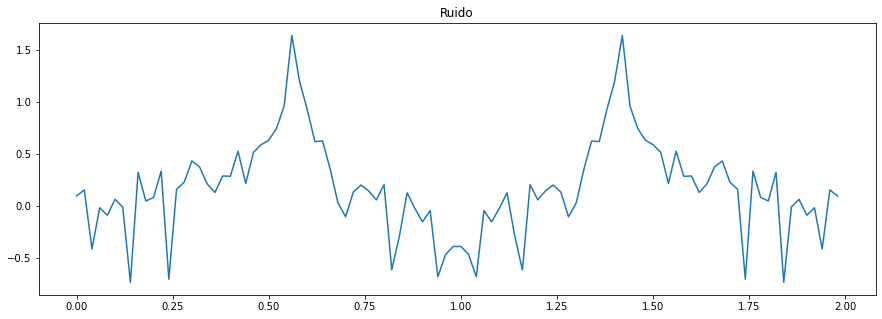

In [1175]:
fig, ax = plt.subplots()

plt.plot(f, eje_y_ruido)
plt.title("Ruido")

plt.show()

¿Qué sucede si le agrega ruido a la señal en 𝑦?\
    Si se le agrega ruido a la señal en 𝑦, esta se vuelve menos 'nítida' y se vuelve más complicado identificar la señal principal.

Pregunta 3

In [1176]:
N=200
max=50
t=np.linspace(0,max,N)
y=np.sin(2*np.pi*np.sqrt(2)*t)
f=np.linspace(0,1/((2*t[1])),100)   

In [1177]:
norma=abs(transf_fourier_d(t,y,f))
eje_y=np.log10(norma)

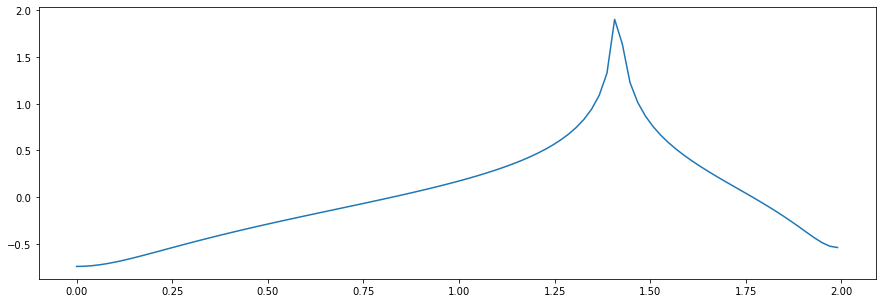

In [1178]:
fig, ax = plt.subplots()
plt.plot(f, eje_y)
plt.show()

In [1179]:
max_y=eje_y.min()
for i in range(0,len(eje_y)):
    if eje_y[i] == eje_y.max():
        max_f=f[i] #pico para gráfica f vs 'y' log
print("El pico principal de de la norma de la transformada es ",max_f)

El pico principal de de la norma de la transformada es  1.4070707070707071


In [1180]:
media_altura_y=eje_y.min()+((eje_y.max()-eje_y.min())/2)
idx=np.argmin(abs(abs(eje_y)-media_altura_y))
ancho=abs(f[idx]-f[np.argmax(eje_y)])
print("El ancho a media altura de de la norma de la transformada es ",ancho)
media_altura_y


El ancho a media altura de de la norma de la transformada es  0.14070707070707078


0.5801427366200681

In [1181]:
peak_idx = np.argmax(eje_y)
left_idx = np.where(eje_y[:peak_idx] <= media_altura_y)[0]
right_idx = np.where(eje_y[peak_idx:] <= media_altura_y)[0]

if len(left_idx) == 0 or len(right_idx) == 0:
    fwhm=0
left_idx = left_idx[-1]  # Último índice a la izquierda del pico
right_idx = right_idx[0] + peak_idx  # Primer índice a la derecha del pico

fwhm = f[right_idx] - f[left_idx]
fwhm

0.32161616161616147

a) Cuando cambiamos el número de muestras N, no cambia la posición del pico debido a que seguimos utilizando la misma frecuencia, solo que ahora tenemos una mejor resolución debido a que con más muestras tenemos más datos y podemos tener una transformada con mayor detalle. SIn embargo, sí varía la FWHM debido a que ****\
b) Cuando cambiamos el rango de tiempo t_max, cambia la posición del pico


Pregunta 4

In [1182]:
N = 80
#Nyq=N/10
ts_0 = np.linspace(0,10,N)
ts = ts_0 + np.random.normal(0.,0.01,N)
Nyq=1/ts_0[1]
fs = np.arange(0,3*Nyq,0.01)
f = 2*np.pi
ys = np.sin(2*np.pi*ts*f)
Nyq

7.8999999999999995

In [1183]:
norma=abs(transf_fourier_d(ts,ys,fs))

pico=fs[np.argmax(norma)]
pico

6.28

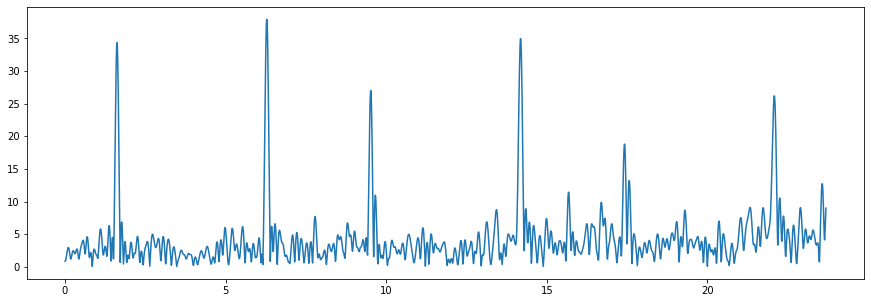

In [1184]:
plt.plot(fs, norma)
plt.show()

Pregunta 5

In [1185]:
url="https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
columnas = ['t', 'y', '𝜎_y']
df = pd.read_csv(url, sep='\s+', header=None,names=columnas)
df['y']-=df['y'].mean()
df


,t,y,𝜎_y
0,5262.50650,-0.130449,0.018
1,5264.50830,0.046551,0.017
2,5265.59327,-0.159449,0.018
3,5266.50460,-0.179449,0.019
4,5267.50409,-0.082449,0.019
...,...,...,...
396,7458.59979,0.098551,0.016
397,7465.50239,-0.181449,0.013
398,7471.53717,0.173551,0.030
399,7475.51366,0.171551,0.017


In [1186]:
fs=np.linspace(0,5,40000)
norma=abs(transf_fourier_d(df['t'],df['y'],fs))

f_ppal=fs[np.argmax(norma)]
print(f_ppal)

3.2592064801620038


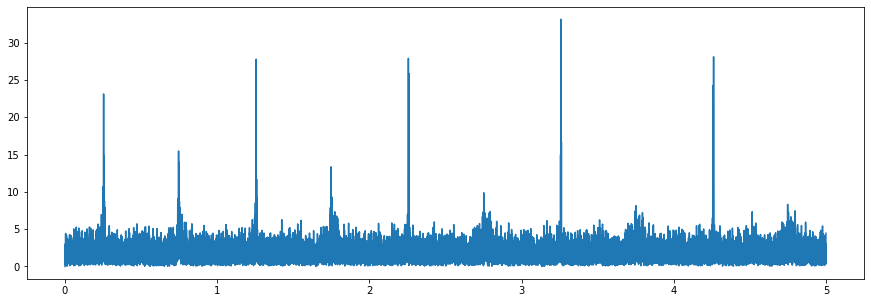

In [1187]:
plt.plot(fs, norma)
plt.show()

In [1188]:
phi=np.mod(df['t']*f_ppal,1)
phi

0      0.595287
1      0.119566
2      0.655707
3      0.625920
4      0.883464
         ...   
396    0.116769
397    0.613767
398    0.282361
399    0.242563
400    0.312588
Name: t, Length: 401, dtype: float64

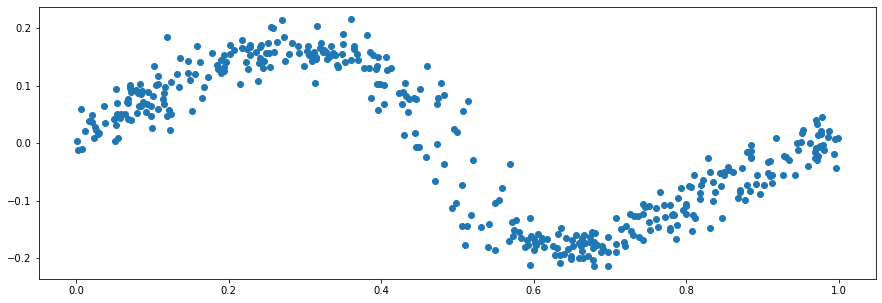

In [1189]:
plt.scatter(phi,df['y'])